# World Rank University EDA #

### Introduction:

The University Rankings datasets provide comprehensive information on the rankings of universities worldwide, offering insights into their performance, reputation, and standing within the global higher education landscape. Compiled b [Name of Organization/Institutin], these datasets serve as valuable resources for researchers, policymakers, educators, students, and other stakeholders interested in assessing and comparing universities based on various criteria.

### Datasets Overview:

**Center World University Ranking dataset:**
- World Rank: The ranking of the university on a global scale.
- University Name: The name of the university.
- Location: The location of the university (country).
- National Rank: The ranking of the university within its country.
- Educational Rank: The ranking of the university based on educational quality and resources.
- Employability Rank: The ranking of the university based on graduate employability.
- Faculty Rank: The ranking of the university based on faculty quality and expertise.
- Research Rank: The ranking of the university based on research output and impact.

**Shanghai Ranking University Ranking dataset:**
- Ranking: This column represents the ranking of the university either on a national/regional level or on a global scale.
- University Name: This column contains the name of the university.
- National/Regional Rank: This column provides the ranking of the university within its respective country or region.
- Total Score: This column contains the total score assigned to each university based on the criteria used for ranking.
- Logo: This column contains links or references to the logos of the universities.
- University Detail: This column may contain additional details or information about each university, such as its location, founding year, campus size, student demographics, notable programs, accreditations, and other relevant information.

**TIME Ranking University Ranking dataset:**
- Rank: This column represents the ranking of the university. It indicates the position of the university relative to other institutions in the dataset based on specific criteria such as academic excellence, research output, and overall reputation.
- University Name: This column contains the name of the university. Each row corresponds to a specific university, and this column provides a unique identifier for each institution.
- Ranking-institution-title href: This column may contain links or references to the website or page of the ranking institution responsible for compiling the university rankings. Including these links allows users to access more information about the ranking methodology, criteria, and other details provided by the institution.
- Location: This column provides information about the location of the university.
- Total Score: This column contains the total score assigned to each university based on the criteria used for anking.

### Key Objectives:

1. Understand the distribution and characteristics of university rankings.
2. Explore correlations b
3. Identify the top 10 globally ranked universities
4. Determine the key factors influencing a university's overall ranking
5. Investigate the correlation between national and global university rankings:.iversities globally and nationally.ankings over time (if applicable).
"""licable).
"""

In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px
import plotly.graph_objects as go
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [143]:
df=pd.read_csv("Data/Word Rank University.csv")

In [144]:
df_shanghaiRanking=pd.read_csv("Data/shanghai Ranking.csv")

In [145]:
TIMES_df = pd.read_csv('Data/Times Higher Education.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [5]:
df.head()

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3


In [6]:
df_shanghaiRanking.head()

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail
0,1,Harvard University,1,100.0,http://www.shanghairanking.com/_uni/logo/032bd...,http://www.shanghairanking.com/institution/har...
1,2,Stanford University,2,76.8,http://www.shanghairanking.com/_uni/logo/13de8...,http://www.shanghairanking.com/institution/sta...
2,3,Massachusetts Institute of Technology (MIT),3,70.1,http://www.shanghairanking.com/_uni/logo/79165...,http://www.shanghairanking.com/institution/mas...
3,4,University of Cambridge,1,69.6,http://www.shanghairanking.com/_uni/logo/8d986...,http://www.shanghairanking.com/institution/uni...
4,5,"University of California, Berkeley",4,65.3,http://www.shanghairanking.com/_uni/logo/0ff17...,http://www.shanghairanking.com/institution/uni...


In [7]:
TIMES_df.head()

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,https://www.timeshighereducation.com/world-uni...,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,University of Manchester,https://www.timeshighereducation.com/world-uni...,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Queen’s University,https://www.timeshighereducation.com/world-uni...,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Universiti Sains Malaysia,https://www.timeshighereducation.com/world-uni...,Malaysia,16.0,94.1,2.0,86.4,1.0,84.9,97.8,96.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,University of Tasmania,https://www.timeshighereducation.com/world-uni...,Australia,13.0,92.8,15.0,96.2,14.0,95.1,96.3,96.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World Rank          2000 non-null   object 
 1   University Names    2000 non-null   object 
 2   Location            2000 non-null   object 
 3   National Rank       2000 non-null   int64  
 4   Educational Rank    2000 non-null   object 
 5   Employability Rank  2000 non-null   object 
 6   Faculty Rank        2000 non-null   object 
 7   Research Rank       2000 non-null   object 
 8   Score               2000 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 140.8+ KB


In [9]:
df_shanghaiRanking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ranking                 1000 non-null   object 
 1   University Name         1000 non-null   object 
 2   National/Regional Rank  1000 non-null   object 
 3   Total Score             1000 non-null   float64
 4   LOGO                    1000 non-null   object 
 5   University Detail       1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [10]:
TIMES_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591 entries, 0 to 1590
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            1591 non-null   object 
 1   University Name                 1591 non-null   object 
 2   ranking-institution-title href  1500 non-null   object 
 3   Location                        1500 non-null   object 
 4   sdg-score-multi__number         867 non-null    float64
 5   sdg-score-multi__value          867 non-null    object 
 6   sdg-score-multi__number 2       826 non-null    float64
 7   sdg-score-multi__value 2        825 non-null    object 
 8   sdg-score-multi__number 3       812 non-null    float64
 9   sdg-score-multi__value 3        805 non-null    object 
 10  sdg-score-multi__value 4        1583 non-null   object 
 11  scores                          1591 non-null   object 
 12  sdg-score-multi__number 5       56

In [11]:
df.columns 

Index(['World Rank', 'University Names', 'Location ', 'National Rank',
       'Educational Rank', 'Employability Rank', 'Faculty Rank',
       'Research Rank', 'Score'],
      dtype='object')

In [12]:
df_shanghaiRanking.columns

Index(['Ranking', 'University Name', 'National/Regional Rank', 'Total Score',
       'LOGO', 'University Detail '],
      dtype='object')

In [13]:
TIMES_df.columns

Index(['Rank', 'University Name ', 'ranking-institution-title href',
       'Location', 'sdg-score-multi__number', 'sdg-score-multi__value',
       'sdg-score-multi__number 2', 'sdg-score-multi__value 2',
       'sdg-score-multi__number 3', 'sdg-score-multi__value 3',
       'sdg-score-multi__value 4', 'scores', 'sdg-score-multi__number 5',
       'sdg-score-multi__value 5', 'sdg-score-multi__number 6',
       'sdg-score-multi__value 6', 'sdg-score-multi__number 7',
       'sdg-score-multi__value 7', 'sdg-score-multi__number 8',
       'sdg-score-multi__value 8'],
      dtype='object')

In [14]:
TIMES_df.shape

(1591, 20)

In [15]:
TIMES_df.describe()

,sdg-score-multi__number,sdg-score-multi__number 2,sdg-score-multi__number 3,sdg-score-multi__number 5,sdg-score-multi__number 6,sdg-score-multi__number 7,sdg-score-multi__number 8
count,867.000000,826.000000,812.000000,565.000000,498.000000,439.000000,483.000000
mean,8.193772,8.446731,7.902709,5.488496,6.777108,7.596811,5.962733
std,4.240660,4.786111,4.403411,3.151375,3.230968,4.278980,3.346928
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000,4.000000
50%,9.000000,8.000000,8.000000,5.000000,6.000000,7.000000,4.000000
75%,11.000000,12.000000,11.000000,8.000000,8.000000,10.000000,7.000000
max,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [16]:
# the datasets were sourced from the Kaggle website, which collected 3 datasets from sites THE and Shanghai

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [17]:
#Last Update is 9 Month ago 

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [18]:
#It is only from Kaggle that the source is available but between 3 dataset The Rank of universities varies according to the criteria of the sites

#### 4. Relevance: 


In [19]:
df.head()

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3


In [146]:
df_shanghaiRanking.drop(["University Detail "],axis=1,inplace=True)



In [147]:
df_shanghaiRanking.drop(["LOGO"],axis=1,inplace=True)


In [148]:
TIMES_df.drop(['ranking-institution-title href', 'sdg-score-multi__number', 'sdg-score-multi__value',
               'sdg-score-multi__number 2', 'sdg-score-multi__value 2',
               'sdg-score-multi__number 3', 'sdg-score-multi__value 3',
               'sdg-score-multi__value 4', 'sdg-score-multi__number 5',
               'sdg-score-multi__value 5', 'sdg-score-multi__number 6',
               'sdg-score-multi__value 6', 'sdg-score-multi__number 7',
               'sdg-score-multi__value 7', 'sdg-score-multi__number 8',
               'sdg-score-multi__value 8'], axis=1, inplace=True)

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [23]:
#Check for and remove duplicate records
df.duplicated().sum()

0

In [24]:
df_shanghaiRanking.duplicated().sum()

0

In [25]:
TIMES_df.duplicated().sum()

0

#### 6. Completeness: 


In [26]:
#checking for null values
df.isnull().sum().sort_values(ascending = False)

World Rank            0
University Names      0
Location              0
National Rank         0
Educational Rank      0
Employability Rank    0
Faculty Rank          0
Research Rank         0
Score                 0
dtype: int64

In [27]:
TIMES_df.isnull().sum().sort_values(ascending=False)

Location            91
Rank                 0
University Name      0
scores               0
dtype: int64

In [28]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World Rank          2000 non-null   object 
 1   University Names    2000 non-null   object 
 2   Location            2000 non-null   object 
 3   National Rank       2000 non-null   int64  
 4   Educational Rank    2000 non-null   object 
 5   Employability Rank  2000 non-null   object 
 6   Faculty Rank        2000 non-null   object 
 7   Research Rank       2000 non-null   object 
 8   Score               2000 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 140.8+ KB


## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

In [35]:
df.head(5)

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3


In [149]:
df.columns=['World Rank','University Names','Location','National Rank','Educational Rank','Employability Rank','Faculty Rank','Research Rank','Score']


In [37]:
df.head()

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World Rank          2000 non-null   object 
 1   University Names    2000 non-null   object 
 2   Location            2000 non-null   object 
 3   National Rank       2000 non-null   int64  
 4   Educational Rank    2000 non-null   object 
 5   Employability Rank  2000 non-null   object 
 6   Faculty Rank        2000 non-null   object 
 7   Research Rank       2000 non-null   object 
 8   Score               2000 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 140.8+ KB


In [186]:
# dataset without null value 
df2=df[(df != 0).all(axis=1)]

In [42]:
# go back to 6th dimention --> Completeness

In [155]:
df['World Rank'] = df['World Rank'].astype(float)
df['National Rank'] = df['National Rank'].astype(int)
df['Educational Rank'] = df['Educational Rank'].astype(int)
df['Employability Rank'] = df['Employability Rank'].astype(int)
df['Faculty Rank'] = df['Faculty Rank'].astype(int)
df['Research Rank'] = df['Research Rank'].astype(int)


In [156]:
# Slice the DataFrame to include rows with index from 100 to 999
sliced_df_sh = df_shanghaiRanking.iloc[100:1000]

sorted_df_sh = sliced_df_sh.sort_values(by='Total Score', ascending=False)

sorted_df_sh['Ranking'] = range(1, len(sorted_df_sh) + 1)

df_shanghaiRanking.loc[sorted_df_sh.index, 'Ranking'] = sorted_df_sh['Ranking']

In [157]:
df_shanghaiRanking.head()

,Ranking,University Name,National/Regional Rank,Total Score
0,1,Harvard University,1,100.0
1,2,Stanford University,2,76.8
2,3,Massachusetts Institute of Technology (MIT),3,70.1
3,4,University of Cambridge,1,69.6
4,5,"University of California, Berkeley",4,65.3


In [158]:
TIMES_df[TIMES_df['Location'].isnull()]

,Rank,University Name,Location,scores


In [151]:
TIMES_df['Location'].fillna('unknown!',inplace=True)

In [53]:
TIMES_df.isnull().sum().sort_values(ascending=False)

Rank                0
University Name     0
Location            0
scores              0
dtype: int64

### Correcting errors

-------------------

In [152]:
df.replace('-', 0, inplace=True)

In [153]:
df["University Names"]=df["University Names"].apply(lambda x: x.split("\n ")[0])

In [154]:
df['World Rank']=df['World Rank'].apply(lambda x: x.split('T')[0])

In [ ]:
df_shanghaiRanking.dtypes

In [159]:
df_shanghaiRanking['Ranking']=df_shanghaiRanking['Ranking'].astype(int)

In [160]:
TIMES_df["Rank"] = TIMES_df["Rank"].apply(lambda x: x[1:] if x.startswith('=') else x)
TIMES_df['Rank'] = range(1, 1592)
TIMES_df["Rank"] =TIMES_df["Rank"].astype(int) 

In [161]:
TIMES_df['scores'] = TIMES_df['scores'].apply(lambda x: x.split('–')[0])
TIMES_df['scores'] =TIMES_df['scores'].astype(float)

In [162]:
TIMES_df.dtypes

Rank                  int32
University Name      object
Location             object
scores              float64
dtype: object

In [ ]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

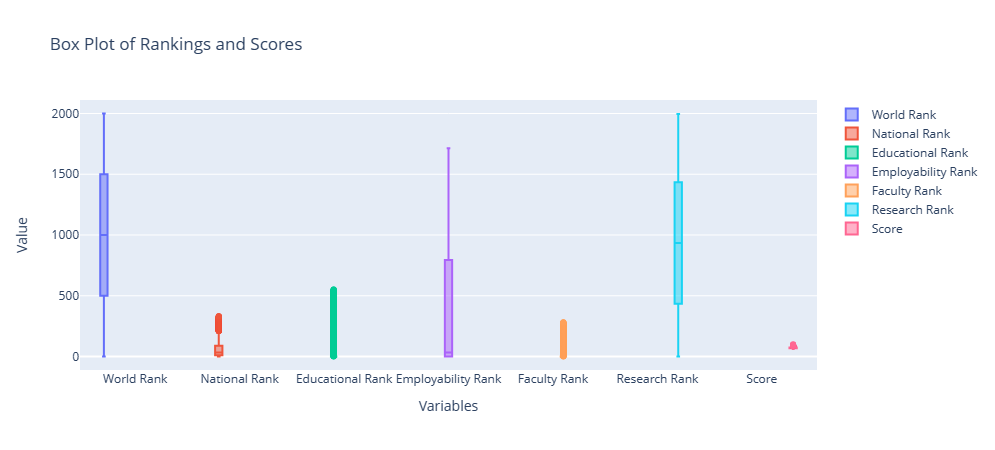

In [163]:

# Create box plot traces
box_traces = []
for column in ['World Rank', 'National Rank', 'Educational Rank', 'Employability Rank', 'Faculty Rank', 'Research Rank', 'Score']:
    box_trace = go.Box(
        y=df[column],
        name=column
    )
    box_traces.append(box_trace)

# Create figure with larger dimensions
fig = go.Figure(data=box_traces)

# Define layout
fig.update_layout(
    title='Box Plot of Rankings and Scores',
    xaxis=dict(title='Variables'),
    yaxis=dict(title='Value'),
    boxmode='group',  # Group box plots together
    width=1000,  # Set the width of the plot
    height=450,  # Set the height of the plot
)

# Show plot
fig.show()


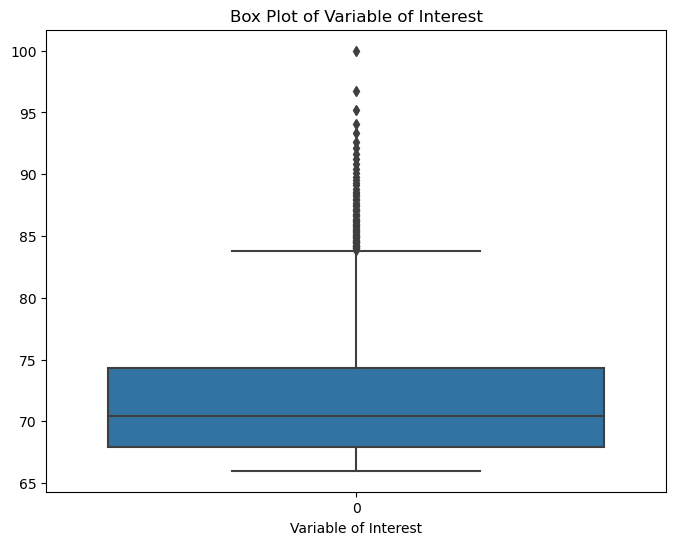

In [164]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['Score'])
plt.title('Box Plot of Variable of Interest')
plt.xlabel('Variable of Interest')
plt.show()

# Calculate quartiles and IQR
Q1 = df['Educational Rank'].quantile(0.25)
Q3 = df['Educational Rank'].quantile(0.75)
IQR = Q3 - Q1


In [165]:
lower_limit= Q1 - 1.5 * IQR
upper_limit= Q3 + 1.5 * IQR
lower_limit ,upper_limit

(0.0, 0.0)

In [166]:
# Outlier 1 is Natural outlier
df[(df['Educational Rank'] < lower_limit) | (df['Educational Rank'] > upper_limit)]

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1.0,Harvard University,USA,1,1,1,1,1,100.0
1,2.0,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3.0,Stanford University,USA,3,11,4,2,2,95.2
3,4.0,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5.0,University of Oxford,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...
1857,1858.0,Union College,USA,321,175,126,0,0,66.5
1865,1866.0,Punjab Agricultural University,India,55,272,0,0,1840,66.4
1875,1876.0,Franklin & Marshall College,USA,323,117,549,0,0,66.4
1904,1905.0,University of Madras,India,60,348,560,0,1921,66.3


## 3. Univariate Analysis: 


### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [167]:
count= df["Location"].value_counts()
count

Location
USA                332
China              314
Japan              114
United Kingdom      93
France              76
                  ... 
Uruguay              1
Iceland              1
Armenia              1
Luxembourg           1
North Macedonia      1
Name: count, Length: 95, dtype: int64

In [168]:
df.dtypes

World Rank            float64
University Names       object
Location               object
National Rank           int32
Educational Rank        int32
Employability Rank      int32
Faculty Rank            int32
Research Rank           int32
Score                 float64
dtype: object

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

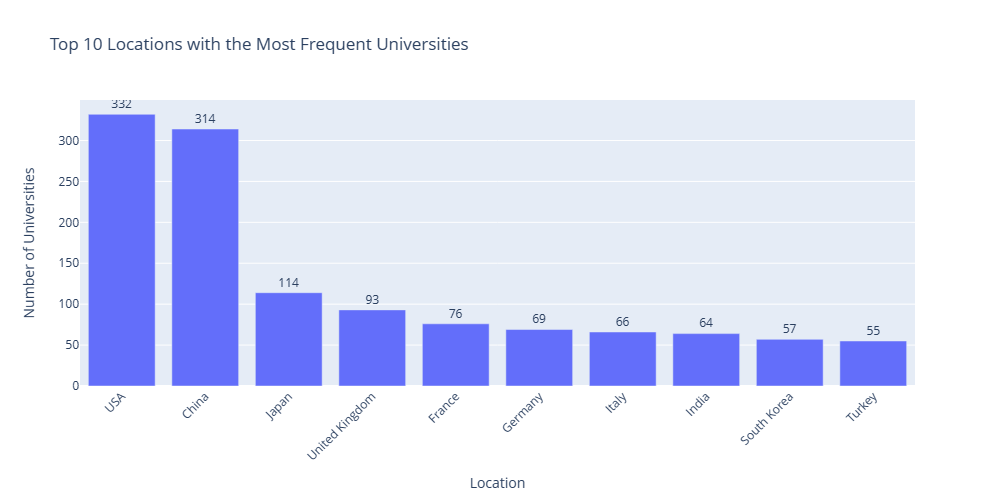

In [169]:
top_locations = df['Location'].value_counts()[:10]

# Create a DataFrame from the value counts
top_locations_df = top_locations.reset_index()
top_locations_df.columns = ['Location', 'Number of Universities']

# Create bar plot using Plotly Express
fig = px.bar(top_locations_df, x='Location', y='Number of Universities', 
             title='Top 10 Locations with the Most Frequent Universities',
             labels={'Location': 'Location', 'Number of Universities': 'Number of Universities'},
             text='Number of Universities',  # Text to display above each bar
             height=500)

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Adjust text position
fig.update_traces(textposition='outside')

# Show plot
fig.show()

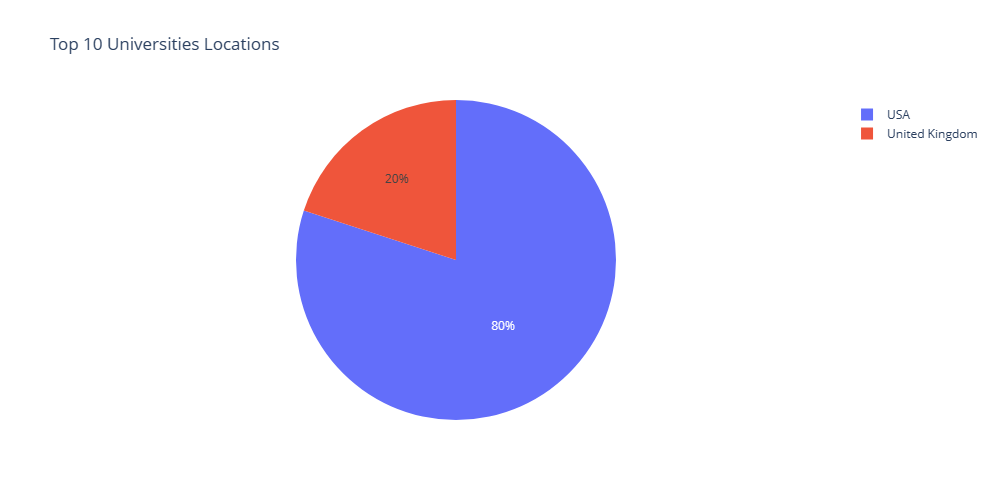

In [141]:
top10_df_sorted = top10_df.sort_values(by='World Rank', ascending=True)
top10_df_sorted = top10_df_sorted.value_counts('Location')

fig = px.pie(top10_df_sorted, values=top10_df_sorted.values, names=top10_df_sorted.index, title='Top 10 Universities Locations')
fig.update_layout(width=800, height=500)
fig.update_yaxes(dtick=10)

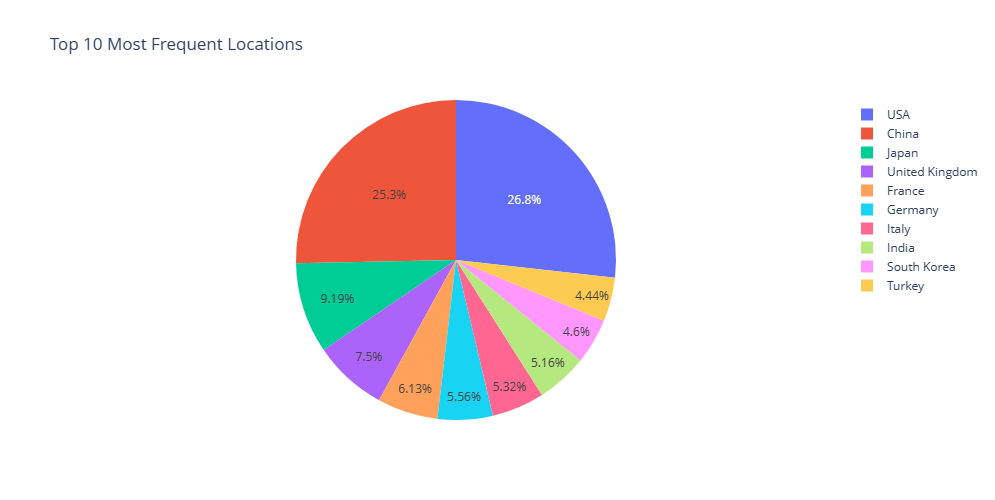

In [170]:
fig = px.pie(top_locations, values=top_locations.values, names=top_locations.index, title='Top 10 Most Frequent Locations ')
fig.update_layout(width=800, height=500)
fig.update_yaxes(dtick=10)

In [171]:
top_locations.index

Index(['USA', 'China', 'Japan', 'United Kingdom', 'France', 'Germany', 'Italy',
       'India', 'South Korea', 'Turkey'],
      dtype='object', name='Location')

# THE PIE

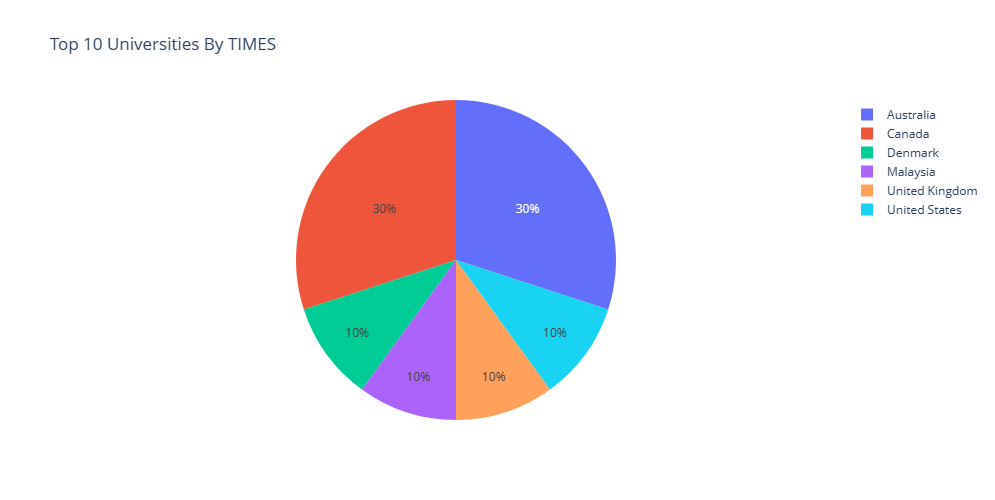

In [172]:
times_top_30 = TIMES_df[TIMES_df['scores'] > 88.3].sort_values(by='scores', ascending=False).head(10)
times_top_30 = times_top_30.value_counts('Location')
fig = px.pie(times_top_30, values=times_top_30.values, names=times_top_30.index, title='Top 10 Universities By TIMES')
fig.update_layout(width=800, height=500)
fig.update_yaxes(dtick=10)

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

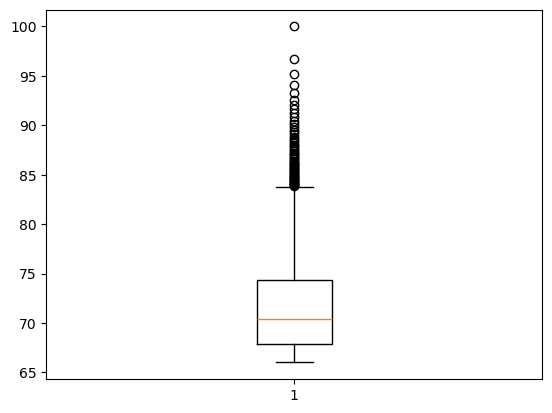

In [63]:
plt.boxplot(df['Score'])
plt.xlabel('')
plt.ylabel('')
plt.title(f'')
plt.show()

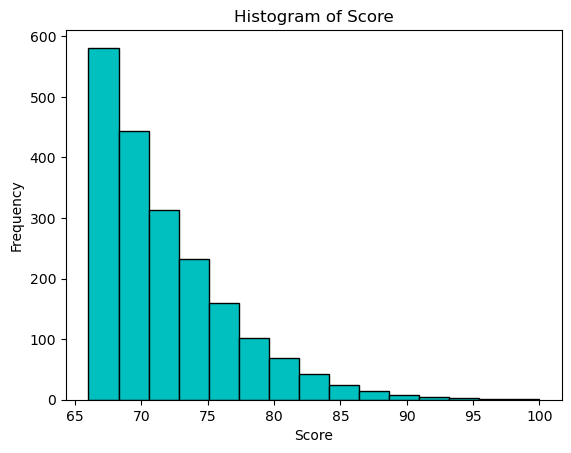

In [64]:
plt.hist(df['Score'],facecolor = 'c', edgecolor = 'Black', bins = 15) # bins = 6 means 6 bars
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title(f'Histogram of Score')
plt.show()

In [65]:
Q1=df['Score'].quantile(0.25)
Q3=df['Score'].quantile(0.75)
Q1, Q3

(67.9, 74.3)

In [66]:
IQR = Q3 - Q1
IQR

6.3999999999999915

In [67]:
lower_limit= Q1 - 1.5 * IQR
upper_limit= Q3 + 1.5 * IQR
lower_limit ,upper_limit

(58.30000000000002, 83.89999999999998)

In [68]:
# Outlier 1 is Natural outlier
df[(df['Score'] < lower_limit) | (df['Score'] > upper_limit)]

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1.0,Harvard University,USA,1,1,1,1,1,100.0
1,2.0,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3.0,Stanford University,USA,3,11,4,2,2,95.2
3,4.0,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5.0,University of Oxford,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...
56,57.0,University of Melbourne,Australia,1,142,411,130,33,84.2
57,58.0,Free University of Berlin,Germany,2,80,1123,44,76,84.1
58,59.0,Humboldt University of Berlin,Germany,3,85,1532,50,69,84.0
59,60.0,Ohio State University,USA,32,129,294,133,40,84.0


### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [69]:
df.describe()

,World Rank,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,1000.500000,69.245000,60.042500,407.176000,18.971000,935.770000,71.75555
std,577.494589,85.538608,137.715284,539.997212,56.385901,576.062685,5.03880
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,66.00000
25%,500.750000,9.750000,0.000000,0.000000,0.000000,434.750000,67.90000
50%,1000.500000,33.000000,0.000000,33.500000,0.000000,934.500000,70.40000
75%,1500.250000,89.000000,0.000000,793.250000,0.000000,1434.250000,74.30000
max,2000.000000,332.000000,552.000000,1713.000000,282.000000,1996.000000,100.00000


## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

In [70]:
top_locations_df= df.head(48)

In [71]:
# top_locations_df.drop_duplicates(inplace = True)

In [72]:
# top_locations_df.head(10)

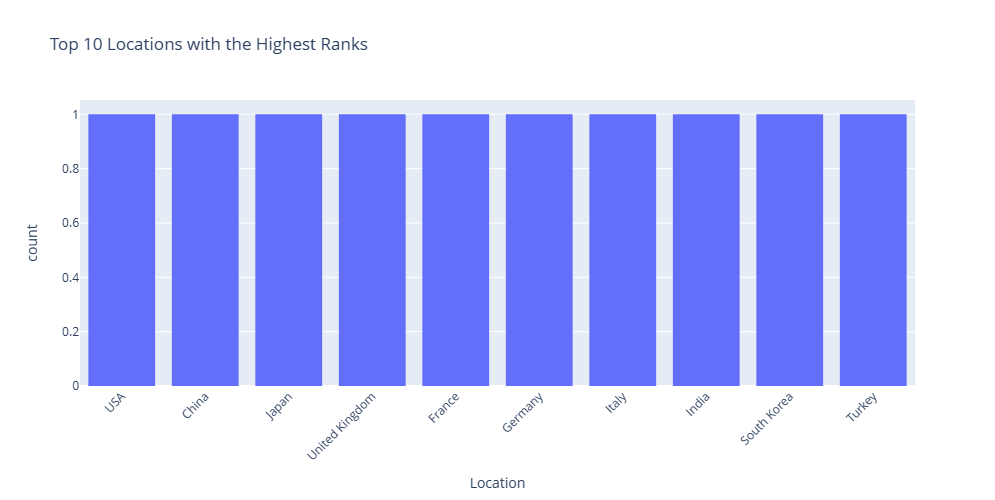

In [173]:
import plotly.express as px

# Create bubble chart
fig = px.histogram(top_locations_df, x='Location', 
                 title='Top 10 Locations with the Highest Ranks',
                 labels={'Location': 'Location', 'World Rank': 'Rank'},
                   # Bubble size based on 'World Rank'
                   # Color scale based on 'World Rank'
                 hover_name='Location',  # Show location name on hover
                 height=500)

# Customize layout
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')),  # Set marker border style
                  selector=dict(mode='markers'), xaxis={'categoryorder':'total ascending'}, textposition='outside')  # Use markers only

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show plot
fig.show()


In [74]:
top_locations_df

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1.0,Harvard University,USA,1,1,1,1,1,100.0
1,2.0,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3.0,Stanford University,USA,3,11,4,2,2,95.2
3,4.0,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5.0,University of Oxford,United Kingdom,2,7,27,9,4,93.3
5,6.0,Princeton University,USA,4,5,16,6,82,92.6
6,7.0,University of Chicago,USA,5,8,15,22,28,92.1
7,8.0,Columbia University,USA,6,12,14,10,13,91.6
8,9.0,University of Pennsylvania,USA,7,14,8,45,12,91.2
9,10.0,Yale University,USA,8,6,35,13,21,90.8


**Categorical & numerical --> (scatter plot, histogram, box plot)**

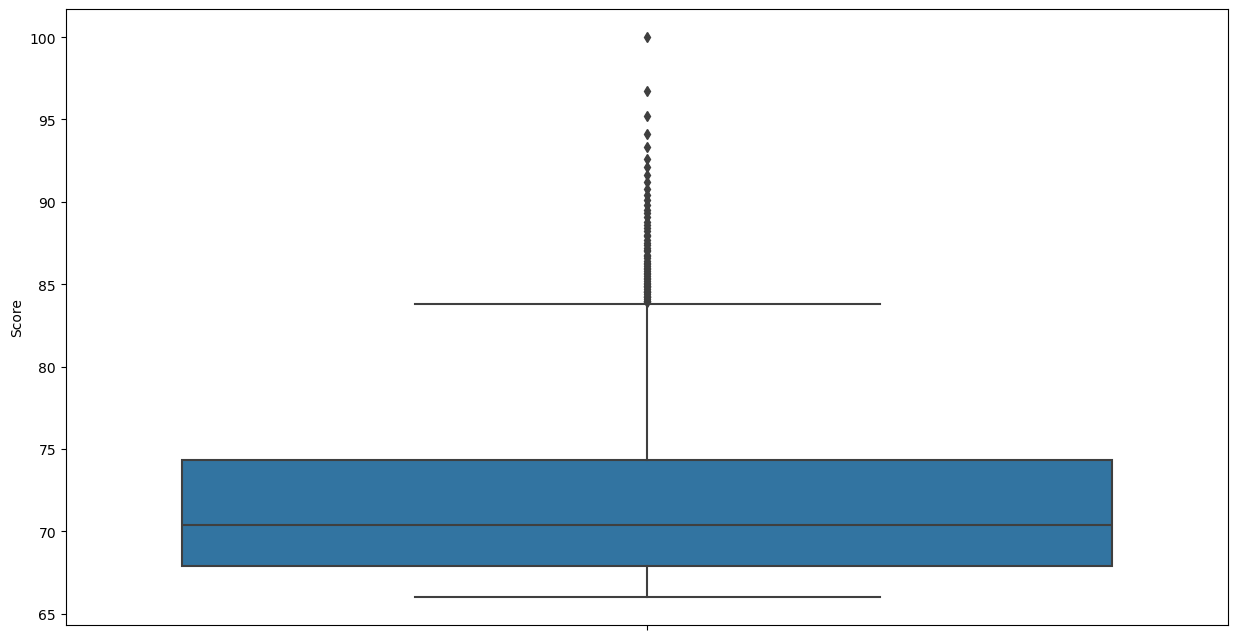

In [174]:
plt.figure(figsize=(15,8))

sns.boxplot(
    df,
    y="Score",
    hue="Location");

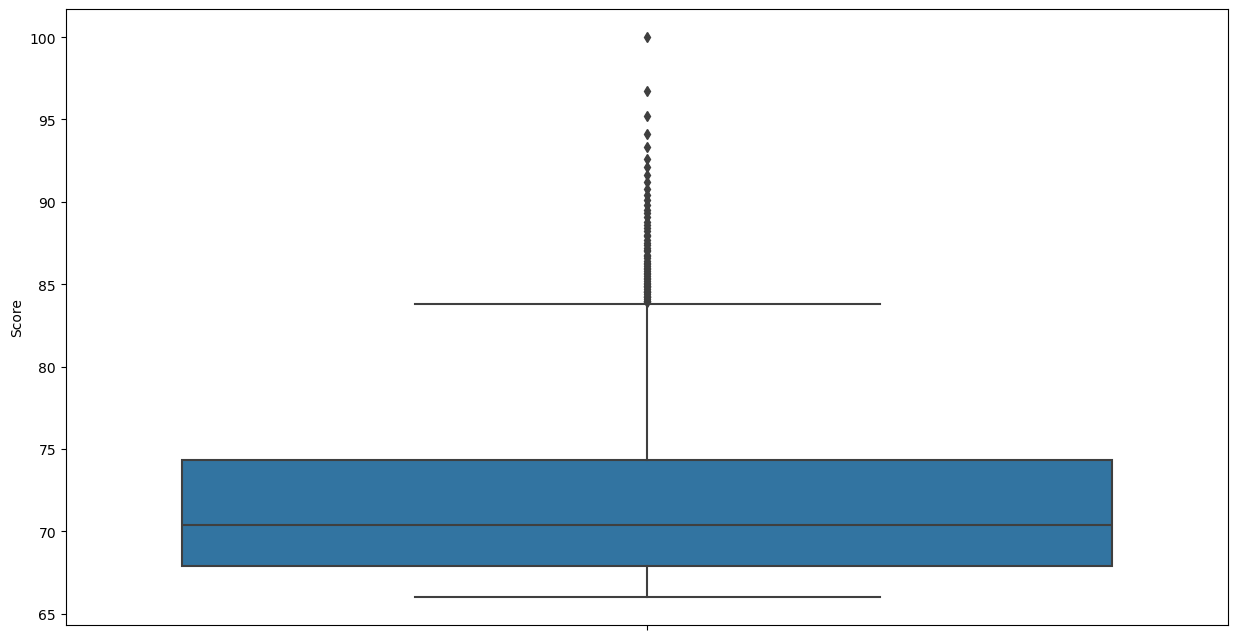

In [175]:
plt.figure(figsize=(15,8))

sns.boxplot(
    df,
    y="Score",
    hue="World Rank");

**numerical & numerical --> (Scatter plot, line chart)**

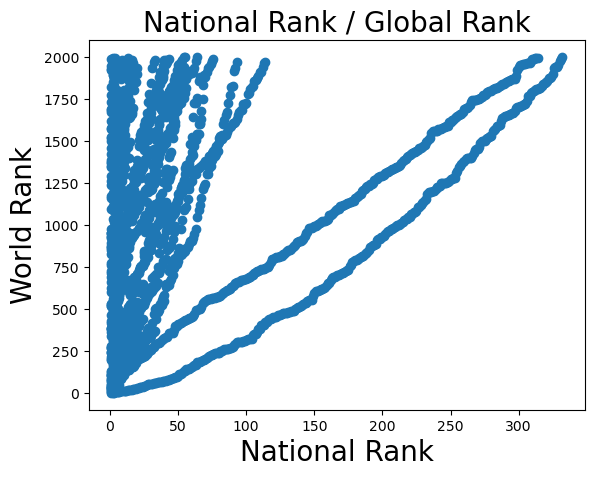

In [176]:
plt.scatter(df['National Rank'],df['World Rank']) 
plt.title('National Rank / Global Rank',fontsize = 20)
plt.xlabel('National Rank',fontsize = 20)
plt.ylabel('World Rank',fontsize = 20)

plt.show()

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

C:\Users\rubaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\rubaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\rubaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\rubaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\rubaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

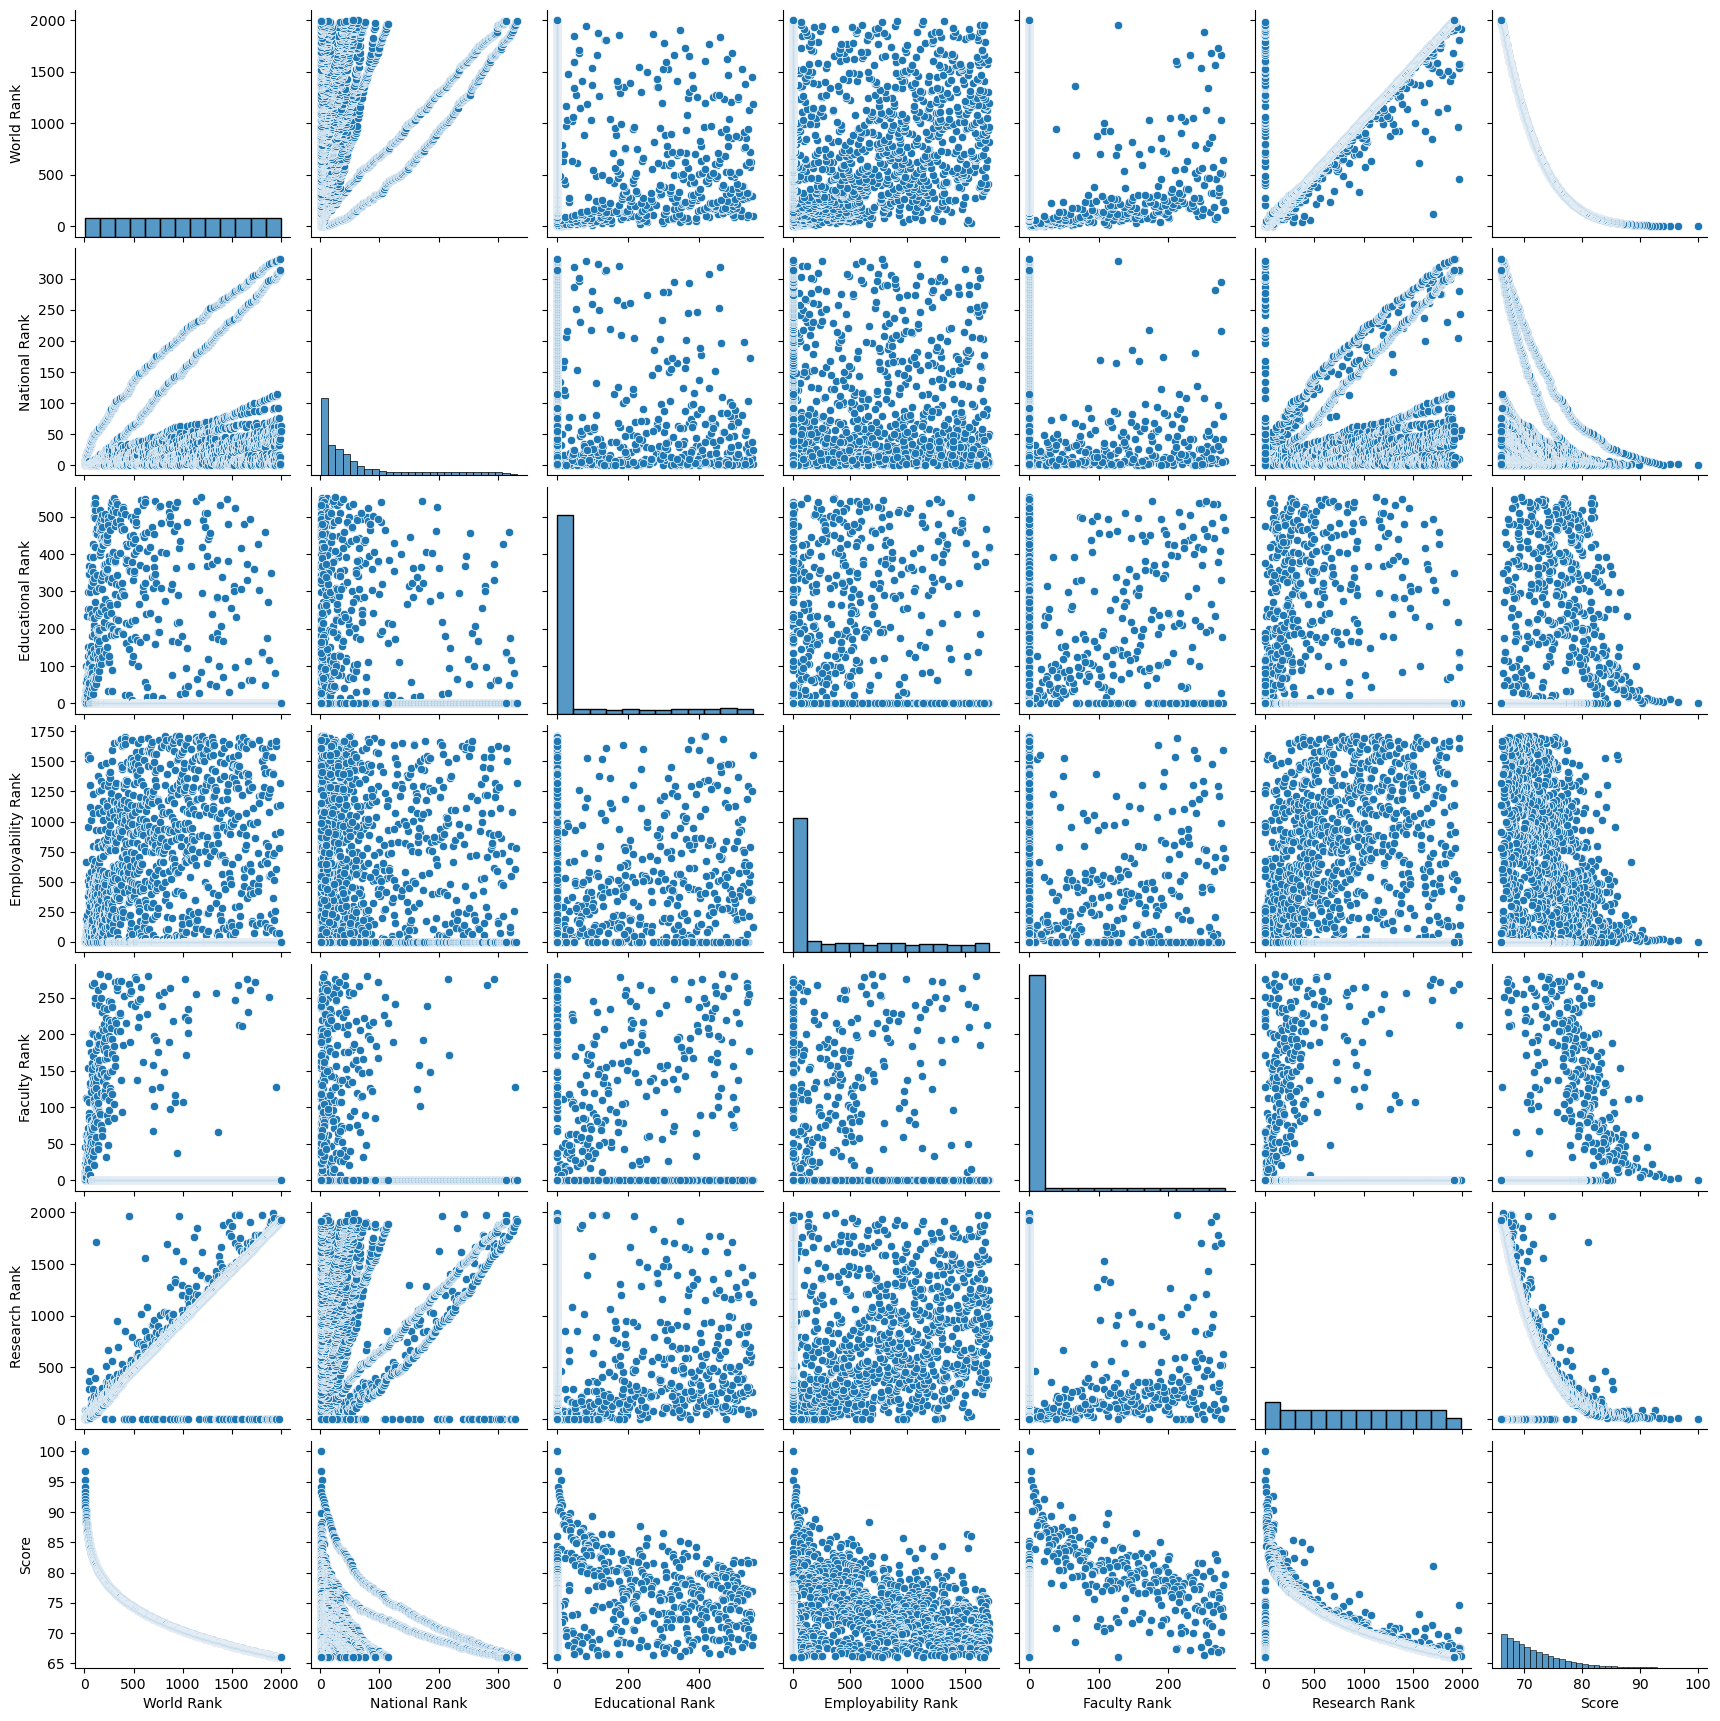

In [181]:
sns.pairplot(df)

In [178]:
df

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1.0,Harvard University,USA,1,1,1,1,1,100.0
1,2.0,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3.0,Stanford University,USA,3,11,4,2,2,95.2
3,4.0,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5.0,University of Oxford,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...
1995,1996.0,Chongqing Jiaotong University,China,314,0,0,0,1917,66.0
1996,1997.0,University of Arkansas at Little Rock,USA,332,0,1322,0,1920,66.0
1997,1998.0,Van Yüzüncü Yıl University,Turkey,54,0,0,0,1919,66.0
1998,1999.0,Bharathidasan University,India,64,0,0,0,1922,66.0


In [179]:
df.isnull().sum()

World Rank            0
University Names      0
Location              0
National Rank         0
Educational Rank      0
Employability Rank    0
Faculty Rank          0
Research Rank         0
Score                 0
dtype: int64

In [182]:
print(TIMES_df['scores'].dtype)

float64


In [183]:
TIMES_df['scores'].unique()

array([99.4, 97.5, 97.2, 96.9, 96.6, 96.5, 96.4, 95.8, 95.6, 95.4, 95. ,
       94.8, 94.5, 94.4, 94. , 93.9, 93.8, 93.5, 93.4, 93. , 92.9, 92.8,
       92.7, 92.6, 92.5, 92.4, 92.3, 92.1, 91.9, 91.8, 91.3, 91.2, 91.1,
       91. , 90.9, 90.8, 90.7, 90.6, 90.5, 90.4, 90.3, 90.1, 90. , 89.9,
       89.8, 89.7, 89.6, 89.5, 89.4, 89.3, 89.2, 89.1, 89. , 88.7, 88.6,
       88.4, 88.3, 82.2, 76.8, 72.7, 66.9, 59.7, 53.9,  7.9])

# Q D & E
d. Considering various factors such as employment rankings, research
rankings, and others, which has the most significant impact on a
university's overall ranking?

e. Is there a correlation between national and global university rankings, and
based on this information, can you recommend a country that appears to
have a high concentration of top-ranked universities?


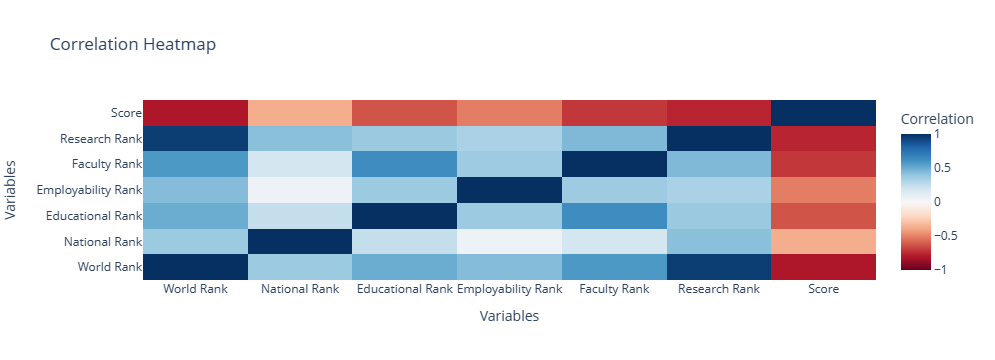

In [242]:
import plotly.graph_objects as go

# Define data
data = df2[['World Rank', 'National Rank', 'Educational Rank', 'Employability Rank', 'Faculty Rank', 'Research Rank', 'Score']].corr()

# Create heatmap trace
heatmap_trace = go.Heatmap(
    z=data.values,  # correlation values
    x=data.columns,  # column names
    y=data.columns,  # row names
    colorscale='RdBu',  # color scale
    colorbar=dict(title='Correlation'),  # color bar title
    zmin=-1,  # minimum value for color scale
    zmax=1,   # maximum value for color scale
    hoverongaps=False,  # disable hover on gaps (NaN values)
    text=data.round(2),  # rounded correlation values
    hoverinfo='text'  # show text on hover
)

# Define layout
layout = go.Layout(
    title='Correlation Heatmap',
    xaxis=dict(title='Variables'),
    yaxis=dict(title='Variables'),
)

# Create figure
fig = go.Figure(data=heatmap_trace, layout=layout)

# Show plot
fig.show()


,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...
1995,1996Top 9.8%,Chongqing Jiaotong University,China,314,-,-,-,1917,66.0
1996,1997Top 9.8%,University of Arkansas at Little Rock,USA,332,-,1322,-,1920,66.0
1997,1998Top 9.8%,Van Yüzüncü Yıl University,Turkey,54,-,-,-,1919,66.0
1998,1999Top 9.8%,Bharathidasan University,India,64,-,-,-,1922,66.0


In [80]:
df.dtypes

World Rank            float64
University Names       object
Location               object
National Rank           int32
Educational Rank        int32
Employability Rank      int32
Faculty Rank            int32
Research Rank           int32
Score                 float64
dtype: object

In [ ]:
df3.head()

In [ ]:
df2.dtypes

In [ ]:
# df3 = df2.loc[df2["Faculty Rank"] < 10]

In [83]:
df2.head(10)

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3
5,6Top 0.1%,Princeton University\n Education: A+; Employa...,USA,4,5,16,6,82,92.6
6,7Top 0.1%,University of Chicago\n Education: A+; Employ...,USA,5,8,15,22,28,92.1
7,8Top 0.1%,Columbia University\n Education: A+; Employab...,USA,6,12,14,10,13,91.6
8,9Top 0.1%,University of Pennsylvania\n Education: A; Em...,USA,7,14,8,45,12,91.2
9,10Top 0.1%,Yale University\n Education: A+; Employabilit...,USA,8,6,35,13,21,90.8


In [86]:
# differences = df['National Rank'].diff()
# differences

# # Any difference greater than 1 indicates a gap
# has_gaps = (differences > 1).any()
# has_gaps

True

In [87]:
df

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1.0,Harvard University,USA,1,1,1,1,1,100.0
1,2.0,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3.0,Stanford University,USA,3,11,4,2,2,95.2
3,4.0,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5.0,University of Oxford,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...
1995,1996.0,Chongqing Jiaotong University,China,314,0,0,0,1917,66.0
1996,1997.0,University of Arkansas at Little Rock,USA,332,0,1322,0,1920,66.0
1997,1998.0,Van Yüzüncü Yıl University,Turkey,54,0,0,0,1919,66.0
1998,1999.0,Bharathidasan University,India,64,0,0,0,1922,66.0


In [89]:
#df['National Rank'] = df['National Rank'].replace(0, np.nan)

In [90]:
df

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1.0,Harvard University,USA,1,1,1,1,1,100.0
1,2.0,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3.0,Stanford University,USA,3,11,4,2,2,95.2
3,4.0,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5.0,University of Oxford,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...
1995,1996.0,Chongqing Jiaotong University,China,314,0,0,0,1917,66.0
1996,1997.0,University of Arkansas at Little Rock,USA,332,0,1322,0,1920,66.0
1997,1998.0,Van Yüzüncü Yıl University,Turkey,54,0,0,0,1919,66.0
1998,1999.0,Bharathidasan University,India,64,0,0,0,1922,66.0


In [190]:
df.isnull().sum()

World Rank            0
University Names      0
Location              0
National Rank         0
Educational Rank      0
Employability Rank    0
Faculty Rank          0
Research Rank         0
Score                 0
dtype: int64

In [191]:
 df.isnull().any(axis=1).sum()

0

In [192]:

saudi_arabia_df = df[df['Location'] == 'Saudi Arabia']

In [193]:
sorted_df = saudi_arabia_df.sort_values(by='World Rank')

## Question A
**universities** are ranked in the top 10 globally

In [194]:
top10_df = df.head(10)

In [195]:
top10_df = top10_df[['World Rank', 'University Names', 'Location']]

In [196]:
top10_df.head(10)

,World Rank,University Names,Location
0,1.0,Harvard University,USA
1,2.0,Massachusetts Institute of Technology,USA
2,3.0,Stanford University,USA
3,4.0,University of Cambridge,United Kingdom
4,5.0,University of Oxford,United Kingdom
5,6.0,Princeton University,USA
6,7.0,University of Chicago,USA
7,8.0,Columbia University,USA
8,9.0,University of Pennsylvania,USA
9,10.0,Yale University,USA


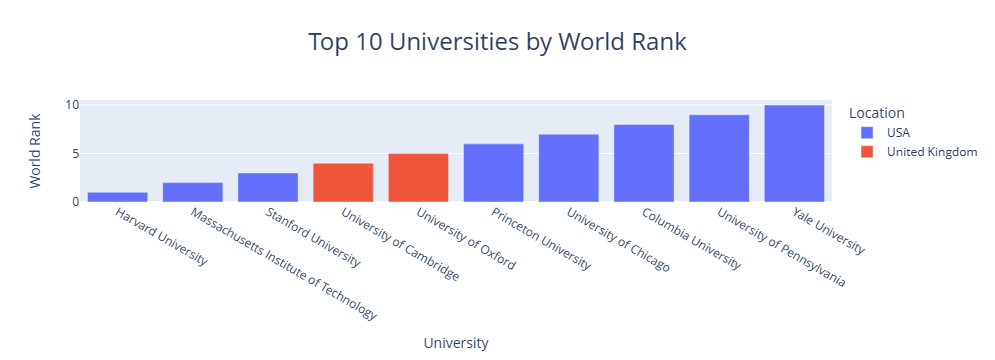

In [197]:
top10_df_sorted = top10_df.sort_values(by='World Rank', ascending=True)

# Plotting the sorted data
fig = px.bar(top10_df_sorted, x='University Names', y='World Rank',
             hover_name='University Names', color='Location',
             title='Top 10 Universities by World Rank',
             labels={'University Names': 'University', 'World Rank': 'Rank'})

# Adjusting layout
fig.update_layout(xaxis_title='University', yaxis_title='World Rank', 
                  title_x=0.5, title_font_size=24, xaxis={'categoryorder':'total ascending'})

# Show the plot
fig.show()

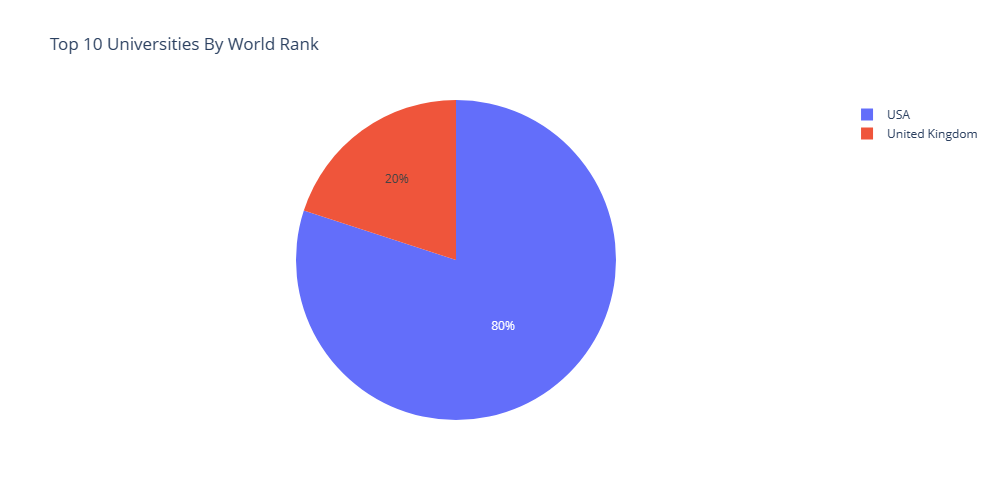

In [198]:
top10_df_sorted = top10_df.sort_values(by='World Rank', ascending=True)
top10_df_sorted = top10_df_sorted.value_counts('Location')

fig = px.pie(top10_df_sorted, values=top10_df_sorted.values, names=top10_df_sorted.index, title='Top 10 Universities By World Rank')
fig.update_layout(width=800, height=500)
fig.update_yaxes(dtick=10)


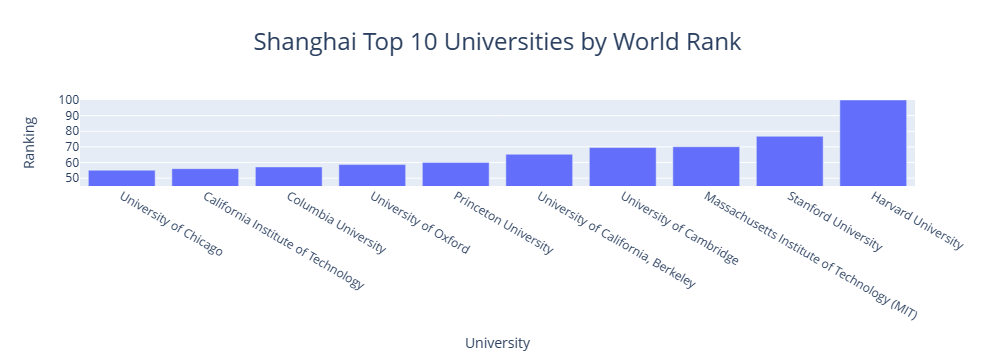

In [239]:
top10_df_sorted_sh = df_shanghaiRanking.head(10).sort_values(by= "Total Score", ascending=True)

# Plotting the sorted data
fig = px.bar(top10_df_sorted_sh, x='University Names', y='Total Score',
             hover_name='University Names',
             title='Shanghai Top 10 Universities by World Rank',
             labels={'University Name': 'University', 'Total Score': 'Ranking'})

# Adjusting layout
fig.update_layout(xaxis_title='University', yaxis_title='Ranking', 
                  title_x=0.5, title_font_size=24, xaxis={'categoryorder':'total ascending'})

fig.update_yaxes(range=[45, 100], dtick=10)


# Show the plot
fig.show()

In [231]:
df_shanghaiRanking

,Ranking,University Names,National/Regional Rank,Total Score
0,1,Harvard University,1,100.0
1,2,Stanford University,2,76.8
2,3,Massachusetts Institute of Technology (MIT),3,70.1
3,4,University of Cambridge,1,69.6
4,5,"University of California, Berkeley",4,65.3
...,...,...,...,...
995,327,University of Wuppertal,46-47,0.0
996,315,Warsaw University of Technology,7-11,0.0
997,258,Western Norway University of Applied Sciences,6-7,0.0
998,246,Wroclaw University of Science and Technology,7-11,0.0


In [ ]:
df_shanghaiRanking.head(10)

,Ranking,University Name,National/Regional Rank,Total Score
0,1,Harvard University,1,100.0
1,2,Stanford University,2,76.8
2,3,Massachusetts Institute of Technology (MIT),3,70.1
3,4,University of Cambridge,1,69.6
4,5,"University of California, Berkeley",4,65.3
5,6,Princeton University,5,60.0
6,7,University of Oxford,2,58.7
7,8,Columbia University,6,57.2
8,9,California Institute of Technology,7,56.1
9,10,University of Chicago,8,55.1


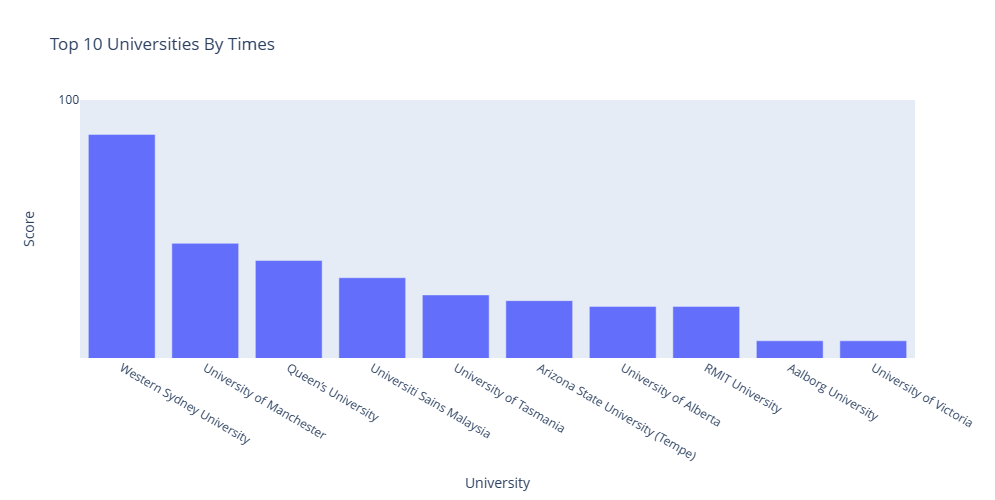

In [232]:
times_top_88 = TIMES_df[TIMES_df['scores'] > 88.3].sort_values(by='scores', ascending=False).head(10)

fig = px.bar(x=times_top_88['University Name '], y=times_top_88['scores'], title='Top 10 Universities By Times', labels={'x': 'University', 'y': 'Score'})
fig.update_layout(width=800, height=500)
fig.update_yaxes(dtick=10,range=[95.5,100])

# Question C
**Saudi Arabia** Positions

In [205]:
saudi_arabia_df = df[df['Location'] == 'Saudi Arabia']

In [206]:
saudi_arabia_df = saudi_arabia_df.sort_values(by='World Rank')

In [207]:
saudi_arabia_df

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
244,245.0,King Abdulaziz University,Saudi Arabia,1,0,1330,0,186,77.8
278,279.0,King Abdullah University of Science and Techno...,Saudi Arabia,2,0,0,171,297,77.2
351,352.0,King Saud University,Saudi Arabia,3,0,344,0,332,76.1
656,657.0,King Fahd University of Petroleum and Minerals,Saudi Arabia,4,0,107,0,792,72.8
1310,1311.0,King Saud bin Abdulaziz University for Health ...,Saudi Arabia,5,0,0,0,1255,68.8
1446,1447.0,King Khalid University,Saudi Arabia,6,0,0,0,1385,68.1
1508,1509.0,Taif University,Saudi Arabia,7,0,0,0,1445,67.9
1546,1547.0,Imam Abdulrahman Bin Faisal University,Saudi Arabia,8,0,0,0,1484,67.7
1585,1586.0,Taibah University,Saudi Arabia,9,0,0,0,1520,67.5
1710,1711.0,Prince Sattam Bin Abdulaziz University,Saudi Arabia,10,0,0,0,1636,67.0


In [208]:
saudi_arabia_df = saudi_arabia_df

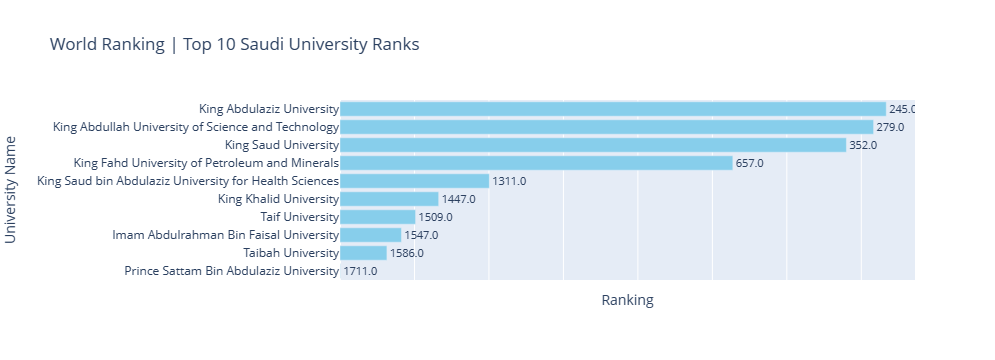

In [209]:
import plotly.graph_objects as go

# Assuming saudi_arabia_df contains your data

# Sort the dataframe by 'World Rank' ascending to display lowest rank at the top
saudi_arabia_df = saudi_arabia_df.sort_values('World Rank', ascending=True).head(10)

# Calculate a transformed rank that emphasizes lower ranks with larger values
# For example, you can use a formula like max_rank - actual_rank + 1
max_rank = saudi_arabia_df['World Rank'].max()
saudi_arabia_df['Transformed Rank'] = max_rank - saudi_arabia_df['World Rank'] + 1

# Create the bar trace with transformed ranks
bar_trace = go.Bar(
    y=saudi_arabia_df['University Names'],
    x=saudi_arabia_df['Transformed Rank'],
    orientation='h',  # horizontal orientation
    marker=dict(color='skyblue'),  # bar color
    text=saudi_arabia_df['World Rank'].astype(str),  # text to display on hover (actual ranks)
    textposition='outside',  # display text outside the bars
)

# Define the layout
layout = go.Layout(
    title='World Ranking | Top 10 Saudi University Ranks',
    xaxis=dict(title='Ranking', showticklabels= False),
    yaxis=dict(title='University Name', categoryorder='total ascending'),  # reverse y-axis to display highest rank at the top
)

'''
layout = go.Layout(
    title='Shanghai | Top Saudi Universities Ranks',
    xaxis=dict(title='Rankings', showticklabels= False),
    yaxis=dict(title='University Name', categoryorder='total ascending'),  # reverse y-axis to display highest rank at the top
)
'''

# Create figure
fig = go.Figure(data=[bar_trace], layout=layout)

# Display the figure
fig.show()



In [210]:
new_saudi_arabia_df = df_shanghaiRanking

In [211]:
ren = {"University Name": "University Names"}
new_saudi_arabia_df.rename(columns=ren, inplace=True)


In [212]:
new_saudi_arabia_df

,Ranking,University Names,National/Regional Rank,Total Score
0,1,Harvard University,1,100.0
1,2,Stanford University,2,76.8
2,3,Massachusetts Institute of Technology (MIT),3,70.1
3,4,University of Cambridge,1,69.6
4,5,"University of California, Berkeley",4,65.3
...,...,...,...,...
995,327,University of Wuppertal,46-47,0.0
996,315,Warsaw University of Technology,7-11,0.0
997,258,Western Norway University of Applied Sciences,6-7,0.0
998,246,Wroclaw University of Science and Technology,7-11,0.0


In [213]:
new_saudi_arabia_df = new_saudi_arabia_df.merge(saudi_arabia_df, on= 'University Names')

In [214]:

new_saudi_arabia_df

,Ranking,University Names,National/Regional Rank,Total Score,World Rank,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score,Transformed Rank
0,642,King Abdulaziz University,1-2,0.0,245.0,Saudi Arabia,1,0,1330,0,186,77.8,1467.0
1,643,King Saud University,1-2,0.0,352.0,Saudi Arabia,3,0,344,0,332,76.1,1360.0
2,703,King Abdullah University of Science and Techno...,3,0.0,279.0,Saudi Arabia,2,0,0,171,297,77.2,1433.0
3,822,Taif University,4-5,0.0,1509.0,Saudi Arabia,7,0,0,0,1445,67.9,203.0
4,279,King Khalid University,6,0.0,1447.0,Saudi Arabia,6,0,0,0,1385,68.1,265.0
5,485,Prince Sattam Bin Abdulaziz University,7,0.0,1711.0,Saudi Arabia,10,0,0,0,1636,67.0,1.0


In [215]:
df_shanghaiRanking

,Ranking,University Names,National/Regional Rank,Total Score
0,1,Harvard University,1,100.0
1,2,Stanford University,2,76.8
2,3,Massachusetts Institute of Technology (MIT),3,70.1
3,4,University of Cambridge,1,69.6
4,5,"University of California, Berkeley",4,65.3
...,...,...,...,...
995,327,University of Wuppertal,46-47,0.0
996,315,Warsaw University of Technology,7-11,0.0
997,258,Western Norway University of Applied Sciences,6-7,0.0
998,246,Wroclaw University of Science and Technology,7-11,0.0


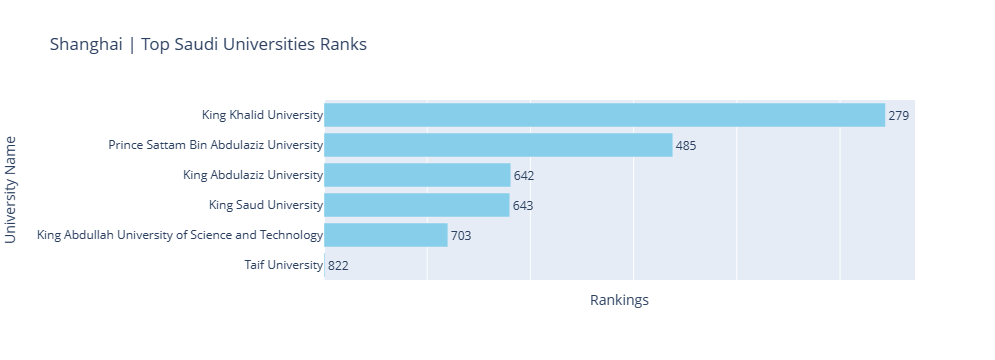

In [216]:
import plotly.graph_objects as go

# Assuming saudi_arabia_df contains your data

# Sort the dataframe by 'World Rank' ascending to display lowest rank at the top
new_saudi_arabia_df = new_saudi_arabia_df.sort_values('World Rank', ascending=True).head(10)

# Calculate a transformed rank that emphasizes lower ranks with larger values
# For example, you can use a formula like max_rank - actual_rank + 1
max_rank = new_saudi_arabia_df['Ranking'].max()
new_saudi_arabia_df['Transformed Rank'] = max_rank - new_saudi_arabia_df['Ranking'] + 1

# Create the bar trace with transformed ranks
bar_trace = go.Bar(
    y=new_saudi_arabia_df['University Names'],
    x=new_saudi_arabia_df['Transformed Rank'],
    orientation='h',  # horizontal orientation
    marker=dict(color='skyblue'),  # bar color
    text=new_saudi_arabia_df['Ranking'].astype(str),  # text to display on hover (actual ranks)
    textposition='outside',  # display text outside the bars
)

# Define the layout
layout = go.Layout(
    title='Shanghai | Top Saudi Universities Ranks',
    xaxis=dict(title='Rankings', showticklabels= False),
    yaxis=dict(title='University Name', categoryorder='total ascending'),  # reverse y-axis to display highest rank at the top
)

# Create figure
fig = go.Figure(data=[bar_trace], layout=layout)

# Display the figure
fig.show()



In [217]:
saudi_arabia_times = TIMES_df[TIMES_df['Location'] == 'Saudi Arabia']
saudi_arabia_times.sort_values(by='Rank').head(10)

,Rank,University Name,Location,scores
136,137,King Abdullah University of Science and Techno...,Saudi Arabia,82.2
137,138,King Faisal University,Saudi Arabia,82.2
164,165,Prince Mohammad Bin Fahd University,Saudi Arabia,82.2
205,206,AlMaarefa University,Saudi Arabia,76.8
243,244,Imam Abdulrahman Bin Faisal University,Saudi Arabia,76.8
244,245,Imam Mohammad Ibn Saud Islamic University,Saudi Arabia,76.8
251,252,King Fahd University of Petroleum and Minerals,Saudi Arabia,76.8
378,379,Prince Sultan University (PSU),Saudi Arabia,72.7
482,483,King Khalid University,Saudi Arabia,66.9
539,540,Qassim University,Saudi Arabia,66.9


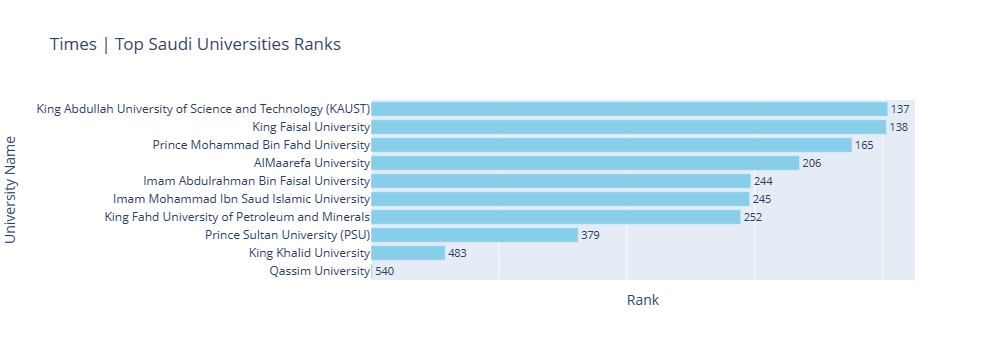

In [218]:
saudi_arabia_times = saudi_arabia_times.head(10)
max_rank = saudi_arabia_times['Rank'].max()
saudi_arabia_times['Transformed Rank'] = max_rank - saudi_arabia_times['Rank'] + 1

# Create the bar trace with transformed ranks
bar_trace = go.Bar(
    y=saudi_arabia_times['University Name '],
    x=saudi_arabia_times['Transformed Rank'],
    orientation='h',  # horizontal orientation
    marker=dict(color='skyblue'),  # bar color
    text=saudi_arabia_times['Rank'].astype(str),  # text to display on hover (actual ranks)
    textposition='outside',  # display text outside the bars
)

# Define the layout
layout = go.Layout(
    title='Times | Top Saudi Universities Ranks',
    xaxis=dict(title='Rank', showticklabels= False),
    yaxis=dict(title='University Name', categoryorder='total ascending'),  # reverse y-axis to display highest rank at the top
)

# Create figure
fig = go.Figure(data=[bar_trace], layout=layout)

# Display the figure
fig.show()


## Question B
top 10 for **employment outcomes**

In [219]:
sorted_df = df.sort_values(by='Employability Rank')

In [220]:
sorted_df = sorted_df[sorted_df["Employability Rank"].apply(lambda x: x > 0)]

In [221]:
sorted_df.head(10)

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1.0,Harvard University,USA,1,1,1,1,1,100.0
119,120.0,INSEAD,France,6,0,2,0,1710,81.1
210,211.0,Institut national du service public,France,11,0,3,0,0,78.5
2,3.0,Stanford University,USA,3,11,4,2,2,95.2
273,274.0,China Europe International Business School,China,32,0,5,0,0,77.3
12,13.0,University of Tokyo,Japan,1,37,6,113,30,89.8
279,280.0,HEC Paris,France,15,0,7,0,0,77.2
8,9.0,University of Pennsylvania,USA,7,14,8,45,12,91.2
44,45.0,Institut Polytechnique de Paris,France,5,102,9,188,370,85.1
405,406.0,International Institute for Management Develop...,Switzerland,8,0,10,0,0,75.3


In [222]:
employability_df = sorted_df[['University Names', 'Employability Rank']]

In [223]:
employability_df

,University Names,Employability Rank
0,Harvard University,1
119,INSEAD,2
210,Institut national du service public,3
2,Stanford University,4
273,China Europe International Business School,5
...,...,...
1612,Kwangwoon University,1705
936,"University of the Republic, Uruguay",1707
820,"Open University, UK",1710
967,Alexandria University,1712


In [224]:
employability_df = employability_df.sort_values('Employability Rank') 

In [225]:
employability_df = employability_df.head(10)
# employability_df.reset_index()


In [226]:
employability_df #= employability_df.drop(['index'], axis=1)

,University Names,Employability Rank
0,Harvard University,1
119,INSEAD,2
210,Institut national du service public,3
2,Stanford University,4
273,China Europe International Business School,5
12,University of Tokyo,6
279,HEC Paris,7
8,University of Pennsylvania,8
44,Institut Polytechnique de Paris,9
405,International Institute for Management Develop...,10


In [227]:
employability_df.head(10)

,University Names,Employability Rank
0,Harvard University,1
119,INSEAD,2
210,Institut national du service public,3
2,Stanford University,4
273,China Europe International Business School,5
12,University of Tokyo,6
279,HEC Paris,7
8,University of Pennsylvania,8
44,Institut Polytechnique de Paris,9
405,International Institute for Management Develop...,10


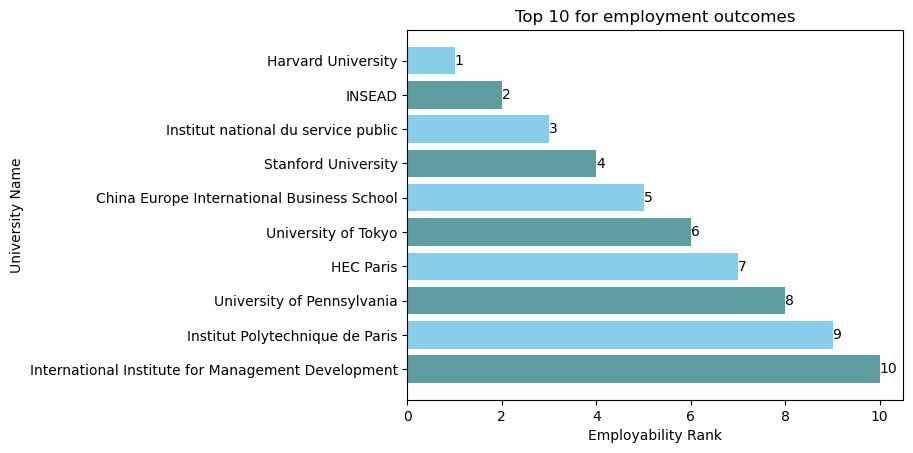

In [228]:

bars = plt.barh(employability_df['University Names'], employability_df['Employability Rank'], color= ['skyblue', 'cadetblue'])
plt.xlabel("Employability Rank")
plt.ylabel("University Name")
plt.title("Top 10 for employment outcomes")

for bar, rank in zip(bars, employability_df['Employability Rank']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(rank), va='center')


plt.gca().invert_yaxis()
plt.show()

In [229]:
df.head(10)

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1.0,Harvard University,USA,1,1,1,1,1,100.0
1,2.0,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3.0,Stanford University,USA,3,11,4,2,2,95.2
3,4.0,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5.0,University of Oxford,United Kingdom,2,7,27,9,4,93.3
5,6.0,Princeton University,USA,4,5,16,6,82,92.6
6,7.0,University of Chicago,USA,5,8,15,22,28,92.1
7,8.0,Columbia University,USA,6,12,14,10,13,91.6
8,9.0,University of Pennsylvania,USA,7,14,8,45,12,91.2
9,10.0,Yale University,USA,8,6,35,13,21,90.8
